### 1. Wine Dataset: Logistic Regression

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv("winequalityN.csv")

In [3]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

dropping quality values with very low samples

In [5]:
wine_df.drop(wine_df.loc[wine_df['quality']==9].index, inplace = True)
wine_df.drop(wine_df.loc[wine_df['quality']==3].index, inplace = True)

In [6]:
wine_df['type'].value_counts()

white    4873
red      1589
Name: type, dtype: int64

In [7]:
wine_df.shape

(6462, 13)

In [8]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
wine_df.dropna(inplace = True)

In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,7.214631,0.338794,0.318881,5.446406,0.055980,30.474020,115.664670,0.994695,3.218079,0.531316,10.492810,5.829185
std,1.295160,0.163019,0.145131,4.758076,0.034884,17.331487,56.173792,0.003000,0.160393,0.149036,1.192715,0.849537
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,4.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992320,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,138.500000,344.000000,1.038980,4.010000,2.000000,14.900000,8.000000


In [11]:
wine_df.shape

(6428, 13)

In [12]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Outlier removal

In [13]:
from scipy import stats

In [14]:
z_scores = stats.zscore(wine_df.drop('type', axis = 1))

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
wine_df = wine_df[filtered_entries]

In [15]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

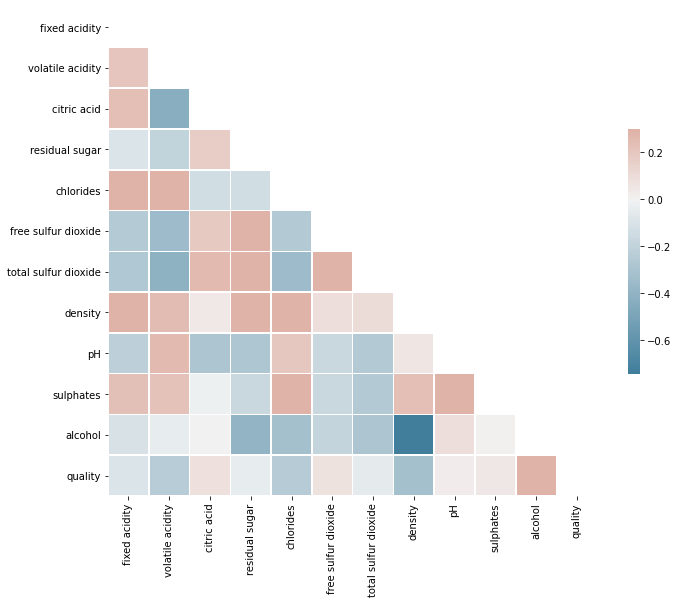

In [16]:
corr = wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

### train - test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test = train_test_split(wine_df, test_size = 0.2, random_state = 42)

In [19]:
X_train.shape

(4748, 13)

In [20]:
X_test.shape

(1187, 13)

### EDA

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

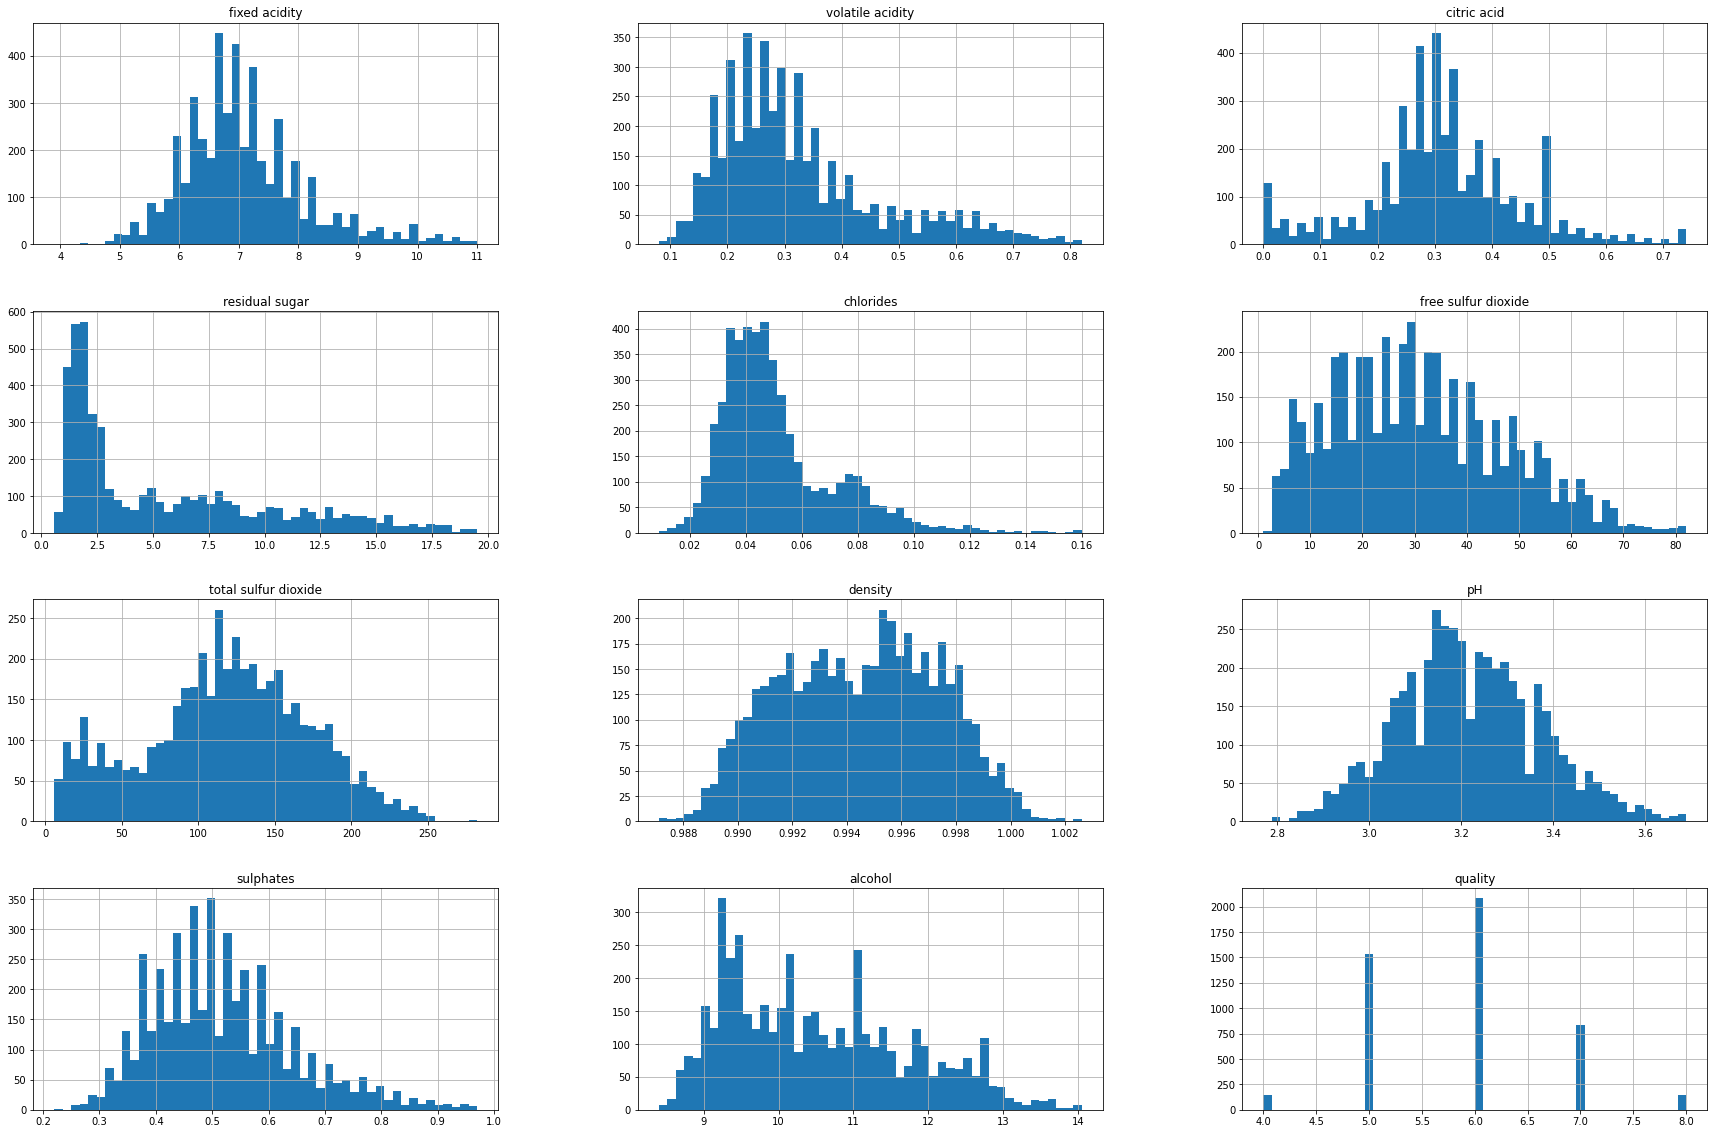

In [21]:
X_train.hist(bins = 50, figsize = (30, 20))

<AxesSubplot:>

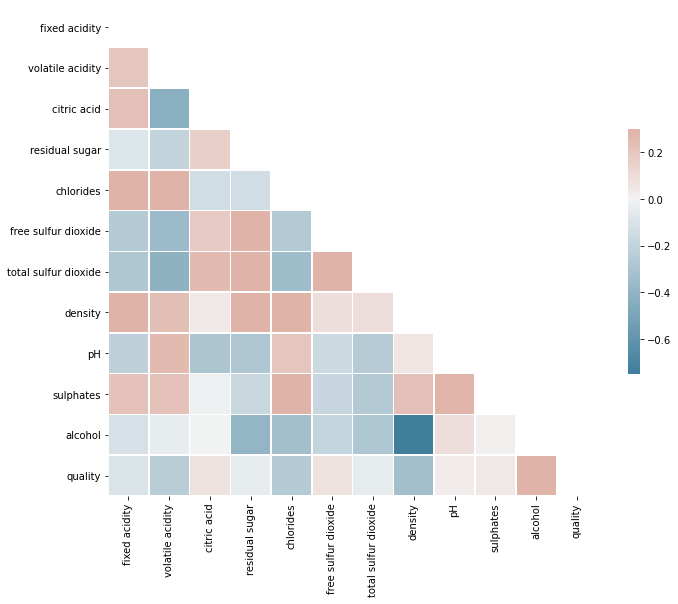

In [22]:
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

### A. Predicting type of wine(white/red), studying the effect of regularisation on Training and Validation sets

### Preprocessing

Train, Test Split

In [23]:
y_wine = wine_df['type']
X_wine = wine_df.drop('type', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.2, random_state = 42)

In [24]:
y_test.value_counts() / y_test.shape[0]

white    0.775906
red      0.224094
Name: type, dtype: float64

In [25]:
y_train.value_counts() / y_train.shape[0]

white    0.791281
red      0.208719
Name: type, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = list(X_train.select_dtypes(include = np.number))
cat_attribs = list(X_train.select_dtypes(include = 'object'))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [27]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [28]:
X_train_prepared.shape

(4748, 12)

In [29]:
X_test_prepared = full_pipeline.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

# no penalty (no regularisation)
log_reg_no_reg = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'none', 
                              max_iter = 2000) 

In [31]:
from sklearn.model_selection import cross_validate

scores_no_reg = cross_validate(log_reg_no_reg, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [32]:
scores_no_reg

{'fit_time': array([0.08006716, 0.04771304, 0.09362316, 0.06384993, 0.02776599]),
 'score_time': array([0.00272298, 0.00319004, 0.00304103, 0.00505805, 0.00230193]),
 'test_score': array([0.99263158, 0.99684211, 0.99473684, 0.99367756, 0.99683878]),
 'train_score': array([0.99578726, 0.99526066, 0.99578726, 0.99578837, 0.99499868])}

l2 regularisation

In [33]:
log_reg_l2 = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              max_iter = 2000) 

In [34]:
scores_l2 = cross_validate(log_reg_l2, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [35]:
scores_l2

{'fit_time': array([0.06251907, 0.04405808, 0.06955099, 0.02628493, 0.02790523]),
 'score_time': array([0.00289989, 0.00372815, 0.00224805, 0.00231218, 0.00218272]),
 'test_score': array([0.99052632, 0.99684211, 0.99473684, 0.9947313 , 0.99789252]),
 'train_score': array([0.99578726, 0.99578726, 0.99631385, 0.99552514, 0.99552514])}

l1 regularisation

In [36]:
log_reg_l1 = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                              max_iter = 2000) 

In [37]:
scores_l1 = cross_validate(log_reg_l1, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [38]:
scores_l1

{'fit_time': array([0.24922919, 0.16516185, 0.11941791, 0.16057205, 0.16892099]),
 'score_time': array([0.00262094, 0.00258422, 0.00245309, 0.00269699, 0.00258803]),
 'test_score': array([0.99263158, 0.99789474, 0.99473684, 0.9947313 , 0.99789252]),
 'train_score': array([0.99578726, 0.99552396, 0.99605055, 0.99605159, 0.99526191])}

elasticnet

In [39]:
log_reg_elasticnet = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                              l1_ratio = 0.5, max_iter = 2000) 

In [40]:
scores_elasticnet = cross_validate(log_reg_elasticnet, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [41]:
scores_elasticnet

{'fit_time': array([0.20865297, 0.12408328, 0.13014221, 0.09495091, 0.14530802]),
 'score_time': array([0.00289893, 0.00261188, 0.0031178 , 0.00242305, 0.00248909]),
 'test_score': array([0.99263158, 0.99789474, 0.99473684, 0.99578504, 0.99789252]),
 'train_score': array([0.99578726, 0.99578726, 0.99631385, 0.99578837, 0.99552514])}

In [42]:
scores_elasticnet['test_score'].mean()

0.9957881426432256

different regularisation coefficients

In [43]:
alphas = np.arange(0.1, 1.1, 0.1)

In [44]:
alphas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [45]:
c_list = []
train_scores = []
test_scores = []

for c in alphas:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list.append(c)
    train_scores.append(scores_various['train_score'].mean())
    test_scores.append(scores_various['test_score'].mean())
    

plot

In [46]:
plot_data = pd.DataFrame({
    'method': ['no_reg', 'l2', 'l1', 'elasticnet'],
    'test': [scores_no_reg['test_score'].mean(), scores_l2['test_score'].mean(), 
            scores_l1['test_score'].mean(), scores_elasticnet['test_score'].mean()],
    'train': [scores_no_reg['train_score'].mean(), scores_l2['train_score'].mean(), 
            scores_l1['train_score'].mean(), scores_elasticnet['train_score'].mean()],
    })

In [47]:
plot_data

,method,test,train
0,no_reg,0.994945,0.995524
1,l2,0.994946,0.995788
2,l1,0.995577,0.995735
3,elasticnet,0.995788,0.995840


In [48]:
alpha_plot = pd.DataFrame(list(zip(c_list, test_scores,train_scores)), columns = ['method', 'test', 'train'])

In [49]:
alpha_plot['method'] = round(alpha_plot['method'], 1)

In [50]:
alpha_plot

,method,test,train
0,0.1,0.992840,0.993787
1,0.2,0.993472,0.994208
2,0.3,0.993682,0.994682
3,0.4,0.993893,0.995103
4,0.5,0.994314,0.995366
5,0.6,0.994735,0.995472
6,0.7,0.994735,0.995630
7,0.8,0.994735,0.995630
8,0.9,0.994735,0.995735
9,1.0,0.994946,0.995788


### No Regularisation and different Regularisations with default values

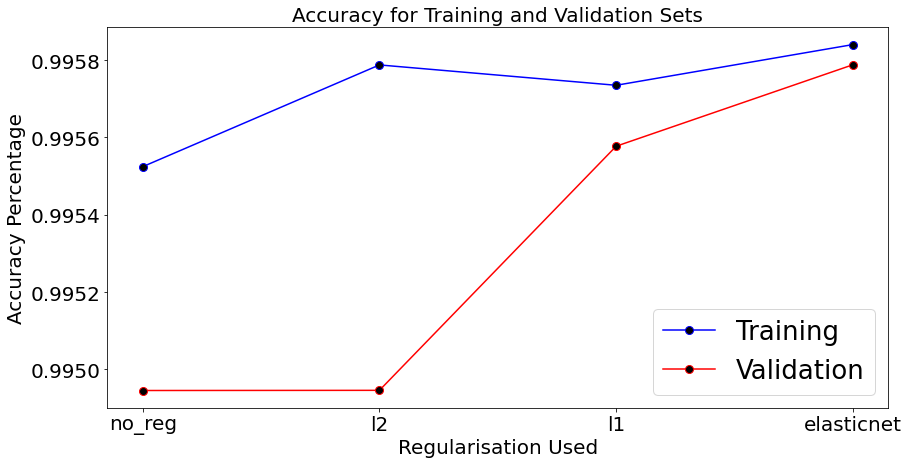

In [51]:
x = plot_data['method']
y = plot_data['test']
z = plot_data['train']
plt.figure(figsize = (14, 7))

plt.plot(x, z, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, y, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('Accuracy for Training and Validation Sets', fontsize = 20)
plt.xlabel('Regularisation Used', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)

### C values variation: L2.

In [52]:
alpha_1 = np.linspace(0.0001, 2.0, 50)

In [53]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [54]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

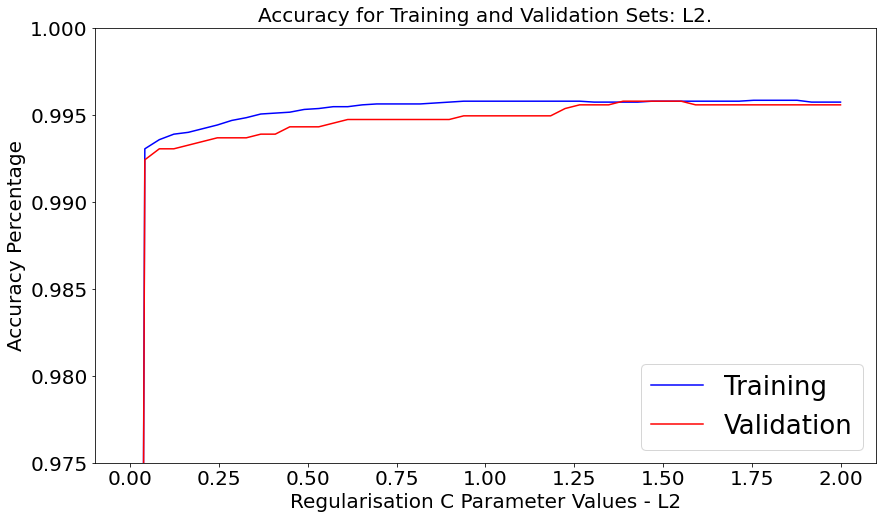

In [55]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L2.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L2', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: L1.

In [56]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                             C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [57]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

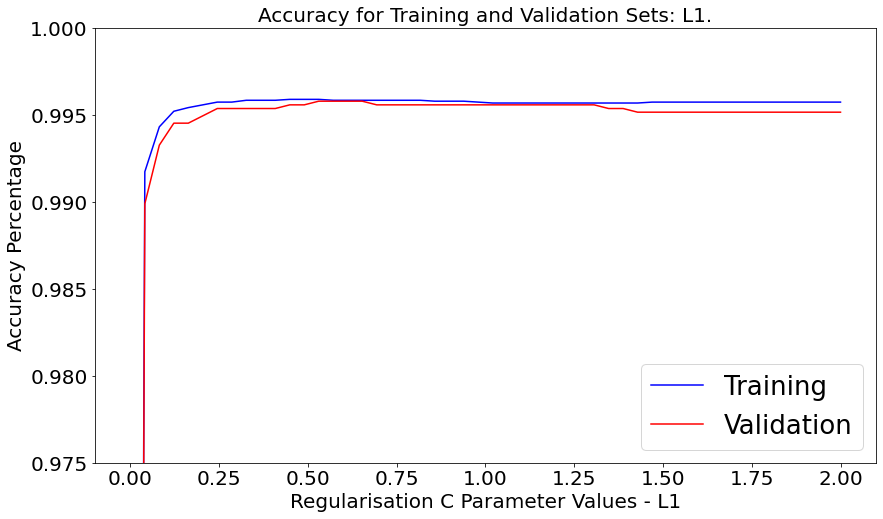

In [58]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L1.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L1', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: ElasticNet.

In [59]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                             C = c, max_iter = 2000, l1_ratio = 0.5) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [60]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

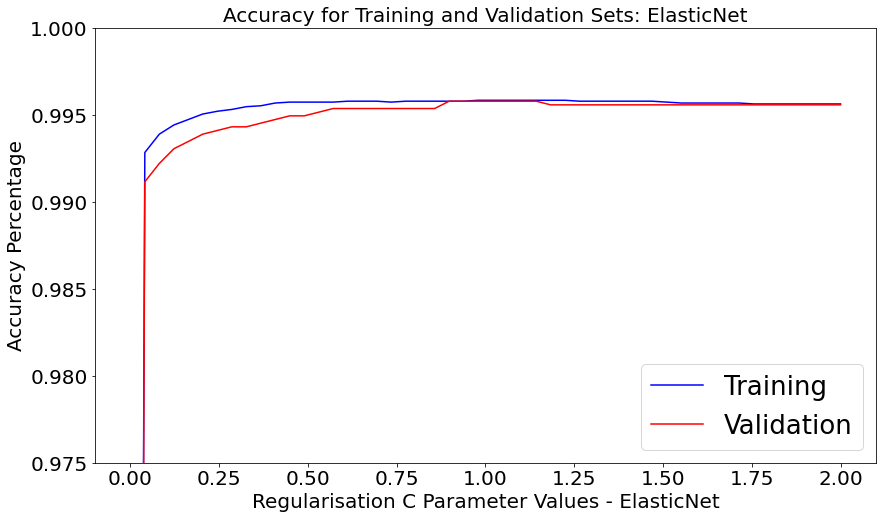

In [61]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: ElasticNet', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - ElasticNet', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### B. Predicting quality of wine(Low/Medium/High), studying the effect of regularisation on Training and Validation sets

In [62]:
wine_df['quality_cat'] = pd.cut(wine_df['quality'],
                               bins = [0, 4.5, 6.5, np.inf],
                               labels = [1, 2, 3])

<ipython-input-62-7c8ffa9b77bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['quality_cat'] = pd.cut(wine_df['quality'],


In [63]:
wine_df['quality_cat'].value_counts()

2    4553
3    1201
1     181
Name: quality_cat, dtype: int64

### Preprocessing

In [64]:
y_wine = wine_df['quality_cat']
X_wine = wine_df.drop(['quality', 'quality_cat'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.2, random_state = 42)

In [65]:
y_test.value_counts() / y_test.shape[0]

2    0.786858
3    0.181129
1    0.032013
Name: quality_cat, dtype: float64

In [66]:
y_train.value_counts() / y_train.shape[0]

2    0.762216
3    0.207666
1    0.030118
Name: quality_cat, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = list(X_train.select_dtypes(include = np.number))
cat_attribs = list(X_train.select_dtypes(include = 'object'))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [68]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [69]:
X_train_prepared.shape

(4748, 13)

In [70]:
X_test_prepared = full_pipeline.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression

# no penalty (no regularisation)
log_reg_no_reg = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'none', 
                              max_iter = 2000) 

In [72]:
from sklearn.model_selection import cross_validate

scores_no_reg = cross_validate(log_reg_no_reg, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [73]:
scores_no_reg

{'fit_time': array([0.20238686, 0.2318542 , 0.11636019, 0.13304806, 0.13025403]),
 'score_time': array([0.00137424, 0.00117183, 0.00107598, 0.00108194, 0.00116205]),
 'test_score': array([0.78421053, 0.78      , 0.76842105, 0.7776607 , 0.7776607 ]),
 'train_score': array([0.78041074, 0.77909426, 0.7835703 , 0.78204791, 0.77730982])}

l2 regularisation

In [74]:
log_reg_l2 = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              max_iter = 2000) 

In [75]:
scores_l2 = cross_validate(log_reg_l2, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [76]:
scores_l2

{'fit_time': array([0.36575007, 0.19192004, 0.18589401, 0.18985319, 0.15421891]),
 'score_time': array([0.00102711, 0.00114202, 0.00095105, 0.00100183, 0.00104713]),
 'test_score': array([0.78210526, 0.78      , 0.77157895, 0.77871444, 0.77976818]),
 'train_score': array([0.78093734, 0.77935756, 0.78278041, 0.78152145, 0.77652014])}

l1 regularisation

In [77]:
log_reg_l1 = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                              max_iter = 2000) 

In [78]:
scores_l1 = cross_validate(log_reg_l1, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [79]:
scores_l1

{'fit_time': array([0.322258  , 0.24010921, 0.18285799, 0.24176502, 0.24818611]),
 'score_time': array([0.00116587, 0.00101399, 0.0010128 , 0.00101972, 0.00115609]),
 'test_score': array([0.78210526, 0.78      , 0.77263158, 0.77871444, 0.77976818]),
 'train_score': array([0.78120063, 0.77935756, 0.7838336 , 0.780995  , 0.77704659])}

elasticnet

In [80]:
log_reg_elasticnet = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                              l1_ratio = 0.5, max_iter = 2000) 

In [81]:
scores_elasticnet = cross_validate(log_reg_elasticnet, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

In [82]:
scores_elasticnet

{'fit_time': array([1.11078501, 0.97837615, 0.99574089, 0.90555501, 0.97427797]),
 'score_time': array([0.00102711, 0.00107694, 0.00157833, 0.00105596, 0.00135112]),
 'test_score': array([0.78210526, 0.78      , 0.77157895, 0.77871444, 0.77976818]),
 'train_score': array([0.78093734, 0.77962085, 0.7838336 , 0.78125823, 0.77652014])}

In [83]:
scores_elasticnet['test_score'].mean()

0.77843336476069

different regularisation coefficients

In [84]:
alphas = np.arange(0.1, 1.1, 0.1)

In [85]:
alphas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [86]:
c_list = []
train_scores = []
test_scores = []

for c in alphas:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list.append(c)
    train_scores.append(scores_various['train_score'].mean())
    test_scores.append(scores_various['test_score'].mean())
    

plot

In [87]:
plot_data = pd.DataFrame({
    'method': ['no_reg', 'l2', 'l1', 'elasticnet'],
    'test': [scores_no_reg['test_score'].mean(), scores_l2['test_score'].mean(), 
            scores_l1['test_score'].mean(), scores_elasticnet['test_score'].mean()],
    'train': [scores_no_reg['train_score'].mean(), scores_l2['train_score'].mean(), 
            scores_l1['train_score'].mean(), scores_elasticnet['train_score'].mean()],
    })

In [88]:
plot_data

,method,test,train
0,no_reg,0.777591,0.780487
1,l2,0.778433,0.780223
2,l1,0.778644,0.780487
3,elasticnet,0.778433,0.780434


In [89]:
alpha_plot = pd.DataFrame(list(zip(c_list, test_scores,train_scores)), columns = ['method', 'test', 'train'])

In [90]:
alpha_plot['method'] = round(alpha_plot['method'], 1)

In [91]:
alpha_plot

,method,test,train
0,0.1,0.779697,0.779749
1,0.2,0.780329,0.779855
2,0.3,0.780118,0.780276
3,0.4,0.779697,0.780487
4,0.5,0.779697,0.780171
5,0.6,0.779276,0.780223
6,0.7,0.778855,0.780329
7,0.8,0.778644,0.780329
8,0.9,0.778433,0.780171
9,1.0,0.778433,0.780223


### No Regularisation and different Regularisations with default values

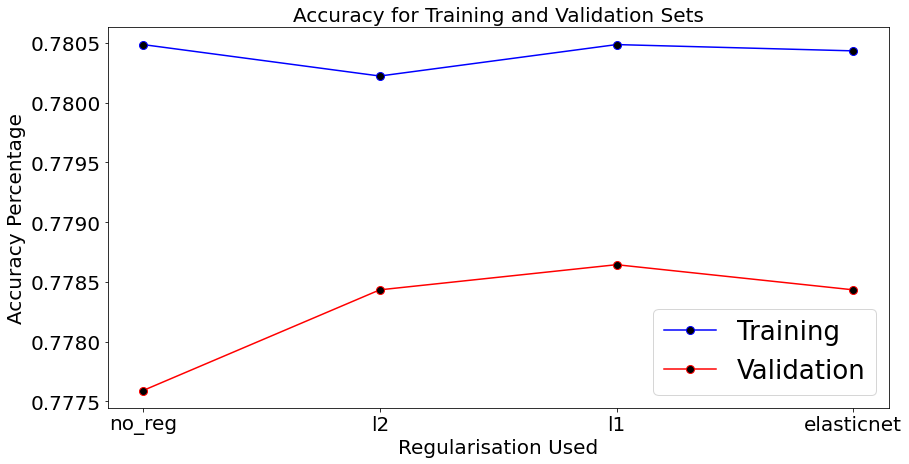

In [92]:
x = plot_data['method']
y = plot_data['test']
z = plot_data['train']
plt.figure(figsize = (14, 7))

plt.plot(x, z, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, y, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('Accuracy for Training and Validation Sets', fontsize = 20)
plt.xlabel('Regularisation Used', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)

### C values variation: L2.

In [93]:
alpha_1 = np.linspace(0.0001, 2.0, 50)

In [94]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="lbfgs", random_state=42, penalty = 'l2', 
                              C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [95]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

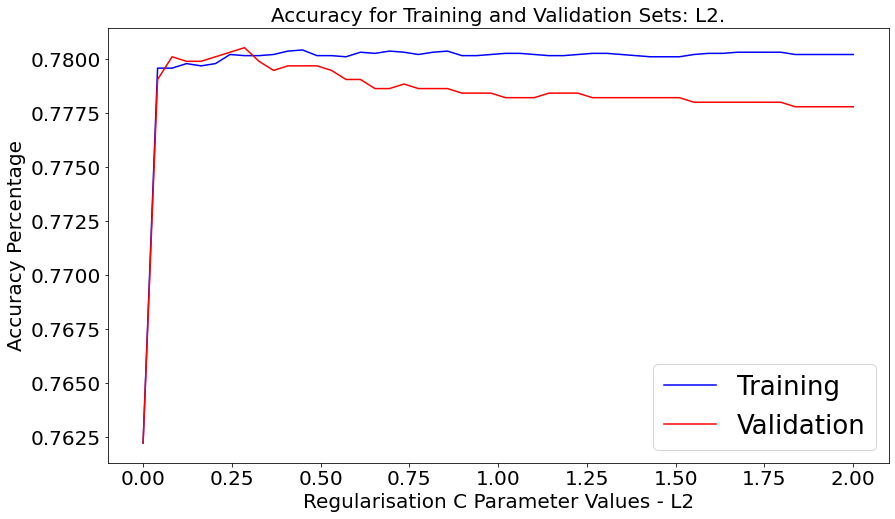

In [96]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L2.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L2', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: L1.

In [97]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'l1', 
                             C = c, max_iter = 2000) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [98]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

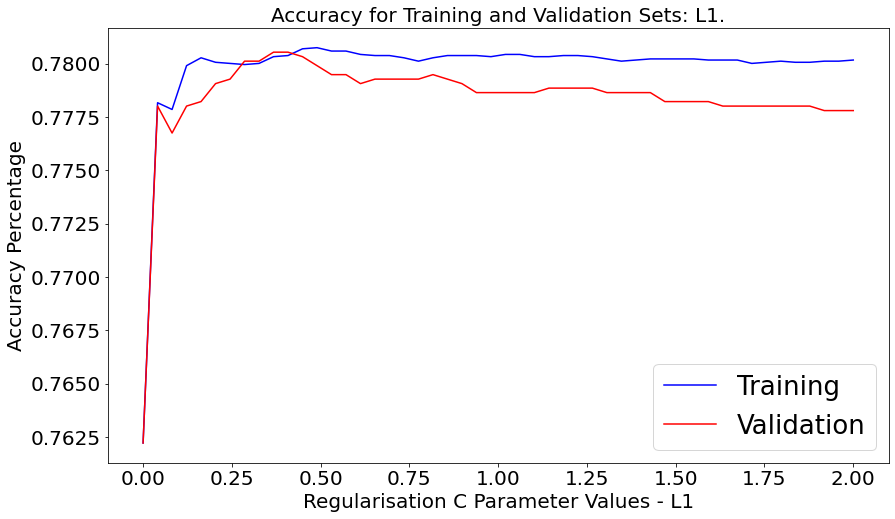

In [99]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: L1.', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - L1', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

### C value variation: ElasticNet.

In [100]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    log_reg_various = LogisticRegression(solver="saga", random_state=42, penalty = 'elasticnet', 
                             C = c, max_iter = 2000, l1_ratio = 0.5) 
    scores_various = cross_validate(log_reg_various, X_train_prepared, y_train, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(scores_various['train_score'].mean())
    test_scores1.append(scores_various['test_score'].mean())

In [101]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

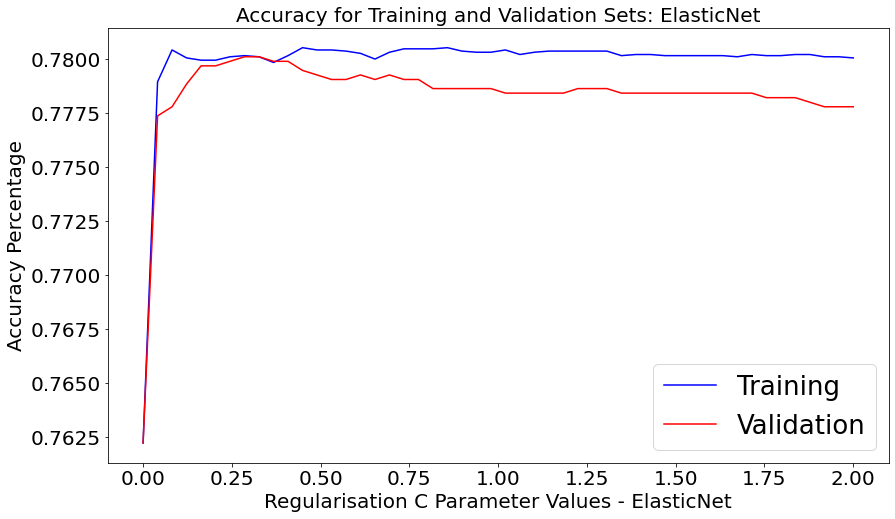

In [102]:
x = alpha_plot1['method']
y = alpha_plot1['test']
z = alpha_plot1['train']
plt.figure(figsize = (14, 8))

plt.plot(x, z, label = "Training", color='blue')
plt.plot(x, y, label = "Validation", color='red')

plt.title('Accuracy for Training and Validation Sets: ElasticNet', fontsize = 20)
plt.xlabel('Regularisation C Parameter Values - ElasticNet', fontsize = 20)
plt.ylabel('Accuracy Percentage', fontsize = 20)
plt.legend(fontsize = 26)
# plt.ylim(0.975, 1.00)
# plt.xticks(x)
plt.tick_params(axis='both', labelsize=20)

## 2. Boston Housing Dataset using Linear Regression and Ridge Regression.

In [103]:
housing = pd.read_csv("BostonHousingData.csv")

In [104]:
housing.shape

(506, 14)

In [105]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [106]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [108]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [109]:
housing.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

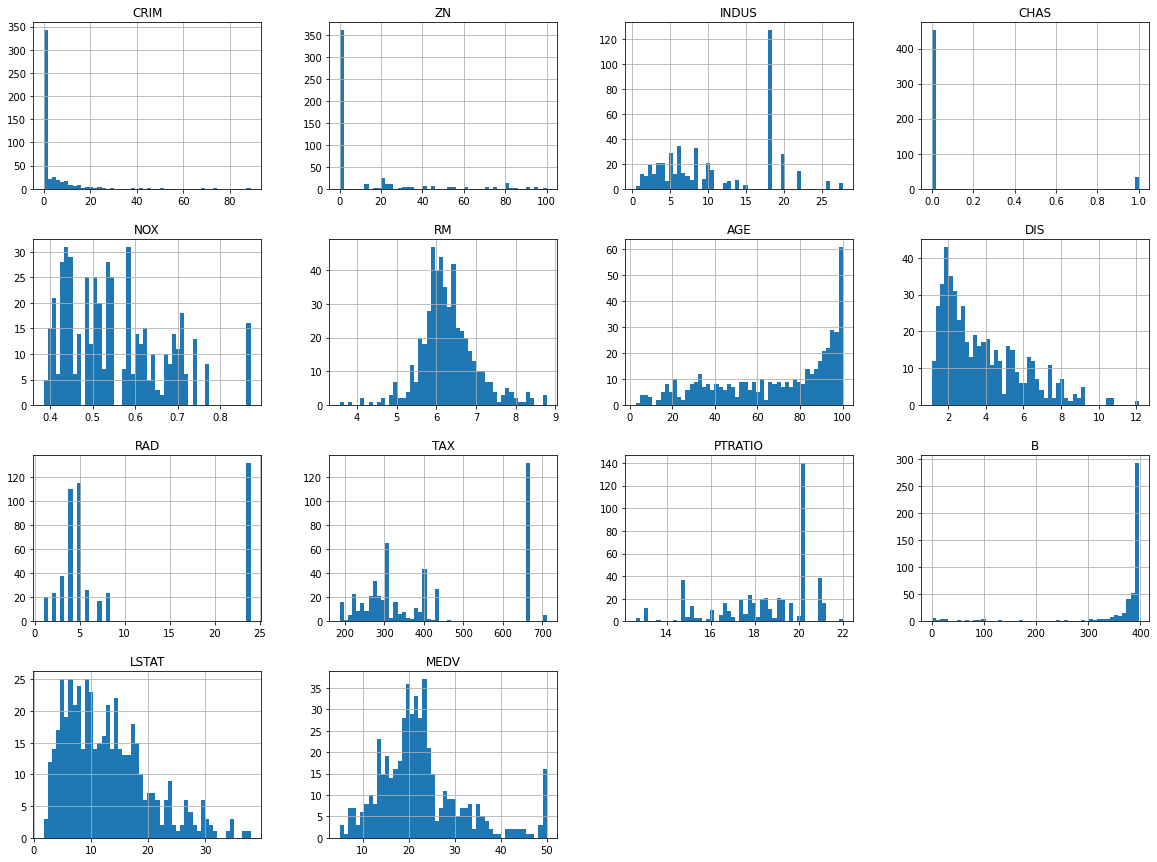

In [110]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

### Splitting into test-train set

In [111]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [112]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,NaN,0.0,0.510,6.416,NaN,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


### Data Visualisation

In [113]:
corr = train_set.corr()

<AxesSubplot:>

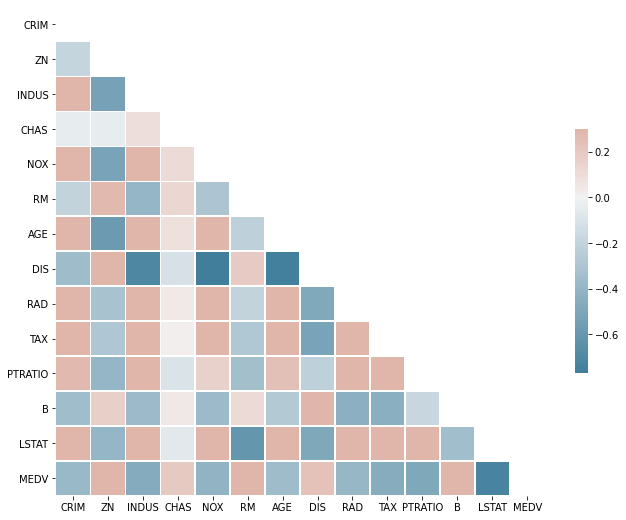

In [114]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [115]:
corr['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.318554
DIS        0.235114
CHAS       0.199610
AGE       -0.359495
CRIM      -0.383800
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.465662
PTRATIO   -0.491210
LSTAT     -0.732602
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='B', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='NOX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='INDUS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='B', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='NOX', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='B'>,
        <AxesSubplot:xlabel='RM', ylabe

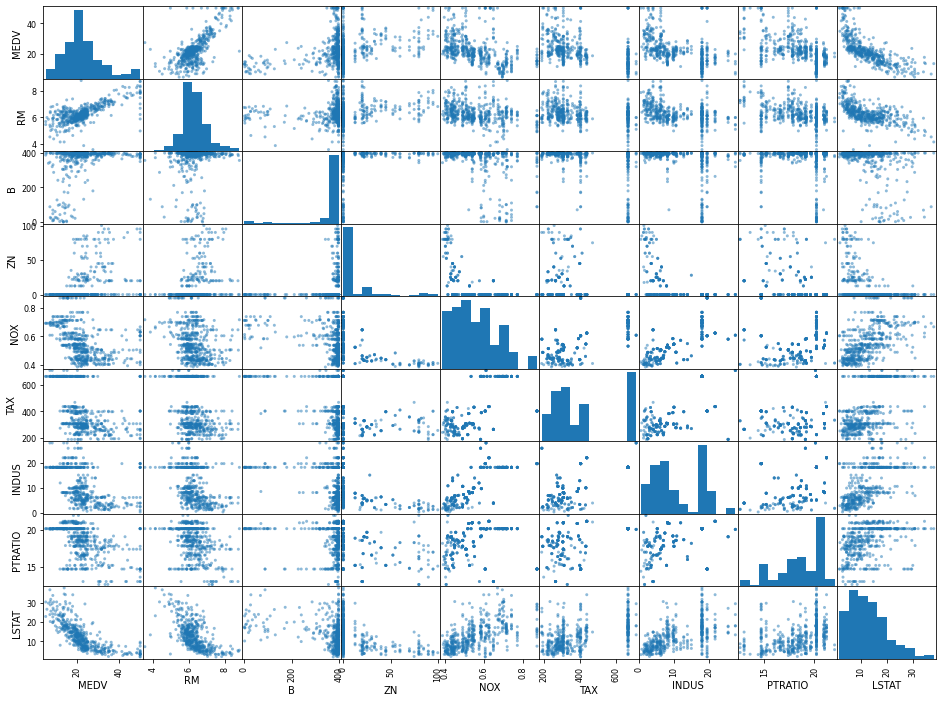

In [116]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "B", "ZN", "NOX", "TAX", "INDUS", "PTRATIO", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(16, 12))

### Preprocessing

In [117]:
# X_train = train_set[['RM', 'B', 'NOX', 'LSTAT']]
X_train = train_set.drop('MEDV', axis = 1)
y_train = train_set["MEDV"].copy()

# X_test = test_set[['RM', 'B', 'NOX', 'LSTAT']]
X_test = test_set.drop('MEDV', axis = 1)
y_test = test_set["MEDV"].copy()

In [118]:
print(X_train.shape, y_train.shape)

(404, 13) (404,)


In [119]:
print(X_test.shape, y_test.shape)

(102, 13) (102,)


In [120]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Column Transformer for a full pipeline.

In [121]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train.columns)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [122]:
X_train_prepared

array([[ 1.31111354, -0.47914112,  1.09091137, ...,  0.84534281,
        -0.07433689,  1.79351779],
       [-0.32017376, -0.47914112, -0.39266084, ...,  1.20474139,
         0.4301838 , -0.56788396],
       [-0.3873391 , -0.47914112, -0.70248315, ..., -0.63717631,
         0.06529747, -0.659812  ],
       ...,
       [-0.38956575,  2.99847869, -1.30574294, ..., -0.59225149,
         0.37901005, -0.92410514],
       [ 0.87337677, -0.47914112,  1.09091137, ...,  0.84534281,
        -2.69458597,  1.55795217],
       [-0.36534461, -0.47914112, -0.33010057, ...,  1.15981657,
        -3.12158061, -0.25762679]])

In [123]:
X_train_prepared.shape

(404, 13)

### Model Training: Normal Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [125]:
X_test_prepared = full_pipeline.transform(X_test)

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

boston_predictions = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, boston_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.998344267846299

#### Using cross validation to see model performance.

RMSE

In [127]:
from sklearn.model_selection import cross_validate

scores_var = cross_validate(lin_reg, X_train_prepared, y_train, cv=10,
                         scoring=('neg_mean_squared_error'),
                         return_train_score=True)

In [128]:
scores_var

{'fit_time': array([0.00146294, 0.00231504, 0.00273824, 0.00227594, 0.00458789,
        0.03700614, 0.00198197, 0.0029211 , 0.00199199, 0.00266218]),
 'score_time': array([0.00197315, 0.00064516, 0.00057602, 0.00063205, 0.00086808,
        0.00394177, 0.00088692, 0.00085092, 0.00069094, 0.00105405]),
 'test_score': array([-13.15484462, -19.59363138, -29.24980783, -46.27153634,
        -22.25746973, -29.4750643 , -21.86867099, -22.19661341,
        -14.84994905, -32.03498802]),
 'train_score': array([-23.48813289, -22.75732361, -21.7145708 , -20.14048591,
        -22.55195947, -21.67720685, -22.57318066, -22.49061605,
        -23.26616876, -21.42555527])}

In [129]:
scores_test = list(scores_var['test_score'])
scores_train = list(scores_var['train_score'])

In [130]:
x = [np.sqrt(-i) for i in scores_train]
y = [np.sqrt(-i) for i in scores_test]
z = np.arange(1, 11, 1)

Score

In [131]:
from sklearn.model_selection import cross_validate

scores_var1 = cross_validate(lin_reg, X_train_prepared, y_train, cv=10,
                         return_train_score=True)

In [132]:
scores_var1

{'fit_time': array([0.00186086, 0.00226903, 0.00134087, 0.00242996, 0.00127625,
        0.00128293, 0.00141835, 0.04327297, 0.00542998, 0.00363994]),
 'score_time': array([0.00071907, 0.00126195, 0.00074911, 0.00075698, 0.00065303,
        0.00067496, 0.00358486, 0.01503205, 0.0010922 , 0.00204897]),
 'test_score': array([0.79566507, 0.77482563, 0.74888335, 0.28062086, 0.77526616,
        0.69527792, 0.82858181, 0.64871537, 0.77949269, 0.55383942]),
 'train_score': array([0.73683769, 0.73776432, 0.73839478, 0.77434535, 0.7361725 ,
        0.74729076, 0.72537062, 0.7485565 , 0.73821212, 0.75798386])}

In [133]:
x1 = list(scores_var1['train_score'])
y1 = list(scores_var1['test_score'])
z1 = np.arange(1, 11, 1)

### Ridge Regression

In [134]:
from sklearn.linear_model import Ridge

RMSE

In [135]:
alpha_1 = np.linspace(0, 100, 100)

In [136]:
c_list1 = []
train_scores1 = []
test_scores1 = []

for c in alpha_1:
    ridge_reg = Ridge(alpha = c) 
    scores_various = cross_validate(ridge_reg, X_train_prepared, y_train, cv=5,
                         scoring=('neg_mean_squared_error'),
                         return_train_score=True)
    c_list1.append(c)
    train_scores1.append(np.sqrt(-(scores_various['train_score'].mean())))
    test_scores1.append(np.sqrt(-(scores_various['test_score'].mean())))

In [137]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list1, test_scores1,train_scores1)), columns = ['method', 'test', 'train'])

In [138]:
x3 = alpha_plot1['method']
y3 = alpha_plot1['test']
z3 = alpha_plot1['train']

Score

In [139]:
c_list11 = []
train_scores11 = []
test_scores11 = []

for c in alpha_1:
    ridge_reg = Ridge(alpha = c) 
    scores_various = cross_validate(ridge_reg, X_train_prepared, y_train, cv=5,
                         return_train_score=True)
    c_list11.append(c)
    train_scores11.append(scores_various['train_score'].mean())
    test_scores11.append(scores_various['test_score'].mean())

In [140]:
alpha_plot11 = pd.DataFrame()
alpha_plot11 = pd.DataFrame(list(zip(c_list11, test_scores11,train_scores11)), columns = ['method', 'test', 'train'])

In [141]:
x2 = alpha_plot11['method']
y2 = alpha_plot11['test']
z2 = alpha_plot11['train']

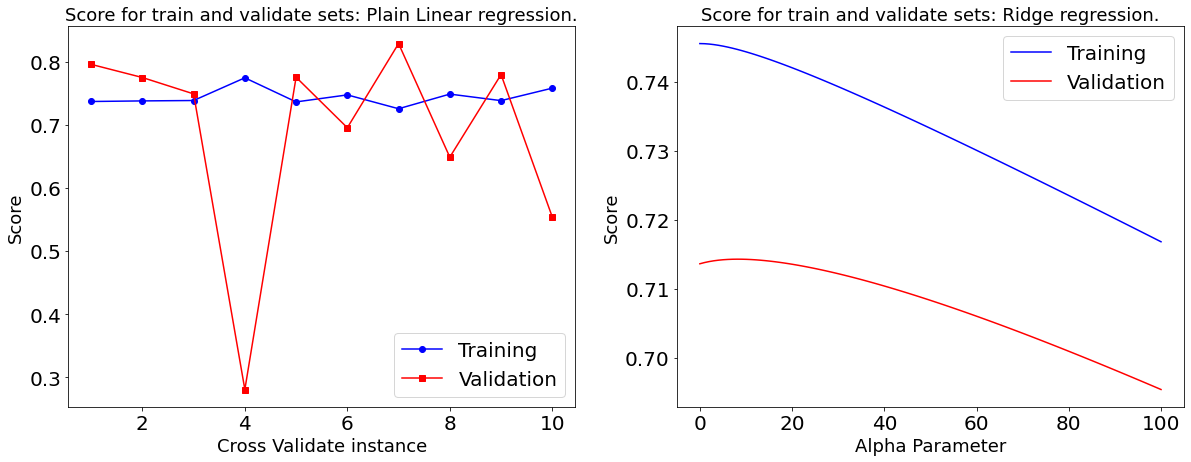

In [142]:
fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

axes[1].plot(x2, z2, label = "Training", color='blue')
axes[1].plot(x2, y2, label = "Validation", color='red')

axes[1].set_title('Score for train and validate sets: Ridge regression.', size = 18)
axes[1].set_xlabel('Alpha Parameter', fontsize = 18)
axes[1].set_ylabel('Score', fontsize = 18)
axes[1].legend(fontsize = 20)
# plt.xticks(x)
axes[1].tick_params(axis='both', labelsize=20)

axes[0].plot(z1, x1, label = "Training", color='blue', marker = 'o')
axes[0].plot(z1, y1, label = "Validation", color='red', marker = 's')

axes[0].set_title('Score for train and validate sets: Plain Linear regression.', size = 18)
axes[0].set_xlabel('Cross Validate instance', fontsize = 18)
axes[0].set_ylabel('Score', fontsize = 18)
axes[0].legend(fontsize = 20)
# plt.ylim(0.975, 1.00)
# axes[0].xticks(z1)
axes[0].tick_params(axis='both', labelsize=20)

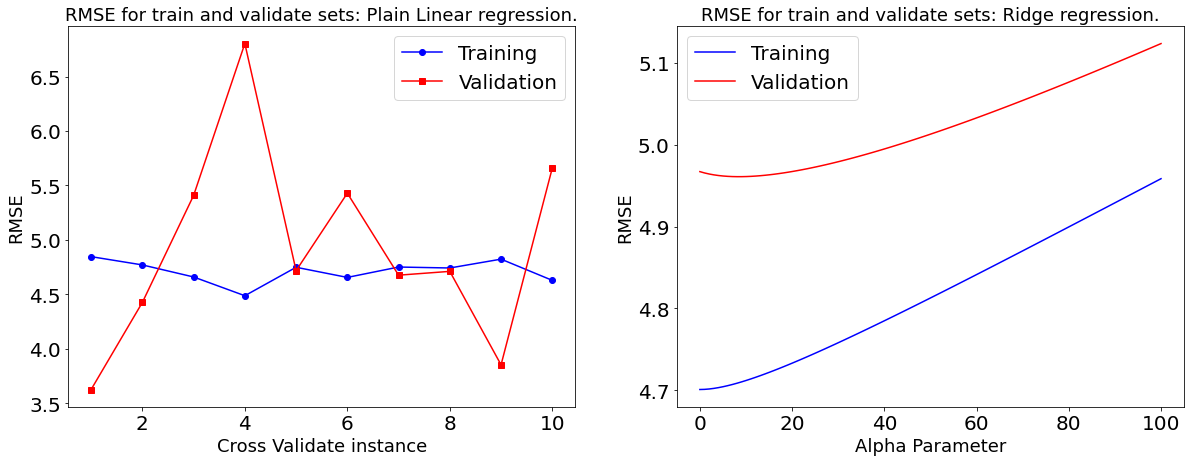

In [143]:
fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

axes[1].plot(x3, z3, label = "Training", color='blue')
axes[1].plot(x3, y3, label = "Validation", color='red')

axes[1].set_title('RMSE for train and validate sets: Ridge regression.', size = 18)
axes[1].set_xlabel('Alpha Parameter', fontsize = 18)
axes[1].set_ylabel('RMSE', fontsize = 18)
axes[1].legend(fontsize = 20)
# plt.xticks(x)
axes[1].tick_params(axis='both', labelsize=20)


axes[0].plot(z, x, label = "Training", color='blue', marker = 'o')
axes[0].plot(z, y, label = "Validation", color='red', marker = 's')

axes[0].set_title('RMSE for train and validate sets: Plain Linear regression.', size = 18)
axes[0].set_xlabel('Cross Validate instance', fontsize = 18)
axes[0].set_ylabel('RMSE', fontsize = 18)
axes[0].legend(fontsize = 20)
# plt.ylim(0.975, 1.00)
# axes[0].xticks(z)
axes[0].tick_params(axis='both', labelsize=20)

### Lasso Regression

In [144]:
from sklearn.linear_model import Lasso

In [145]:
alpha_1 = np.linspace(0, 100, 100)

RMSE

In [146]:
c_list2 = []
train_scores2 = []
test_scores2 = []

for c in alpha_1:
    lasso_reg = Lasso(alpha = c, max_iter = 20000) 
    scores_various = cross_validate(lasso_reg, X_train_prepared, y_train, cv=5,
                         scoring=('neg_mean_squared_error'),
                         return_train_score=True)
    c_list2.append(c)
    train_scores2.append(np.sqrt(-(scores_various['train_score'].mean())))
    test_scores2.append(np.sqrt(-(scores_various['test_score'].mean())))

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3866.967745763344, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent(
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not conv

In [147]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list2, test_scores2,train_scores2)), columns = ['method', 'test', 'train'])

In [148]:
x4 = alpha_plot1['method']
y4 = alpha_plot1['test']
z4 = alpha_plot1['train']

Score

In [149]:
c_list3 = []
train_scores3 = []
test_scores3 = []

for c in alpha_1:
    lasso_reg = Lasso(alpha = c) 
    scores_various = cross_validate(lasso_reg, X_train_prepared, y_train, cv=5,
                         return_train_score=True)
    c_list3.append(c)
    train_scores3.append(scores_various['train_score'].mean())
    test_scores3.append(scores_various['test_score'].mean())

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3866.9677457632934, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent(
/Users/sc47/programs/main/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not con

In [150]:
alpha_plot1 = pd.DataFrame()
alpha_plot1 = pd.DataFrame(list(zip(c_list3, test_scores3,train_scores3)), columns = ['method', 'test', 'train'])

In [151]:
x5 = alpha_plot1['method']
y5 = alpha_plot1['test']
z5 = alpha_plot1['train']

Compare Scores

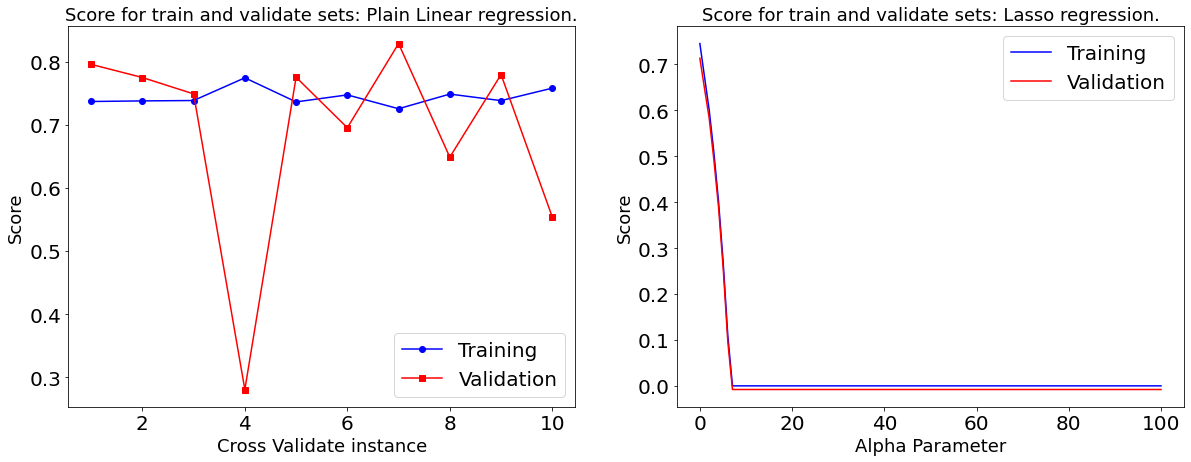

In [152]:
fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

axes[1].plot(x5, z5, label = "Training", color='blue')
axes[1].plot(x5, y5, label = "Validation", color='red')

axes[1].set_title('Score for train and validate sets: Lasso regression.', size = 18)
axes[1].set_xlabel('Alpha Parameter', fontsize = 18)
axes[1].set_ylabel('Score', fontsize = 18)
axes[1].legend(fontsize = 20)
# plt.xticks(x)
axes[1].tick_params(axis='both', labelsize=20)

axes[0].plot(z1, x1, label = "Training", color='blue', marker = 'o')
axes[0].plot(z1, y1, label = "Validation", color='red', marker = 's')

axes[0].set_title('Score for train and validate sets: Plain Linear regression.', size = 18)
axes[0].set_xlabel('Cross Validate instance', fontsize = 18)
axes[0].set_ylabel('Score', fontsize = 18)
axes[0].legend(fontsize = 20)
# plt.ylim(0.975, 1.00)
# axes[0].xticks(z1)
axes[0].tick_params(axis='both', labelsize=20)

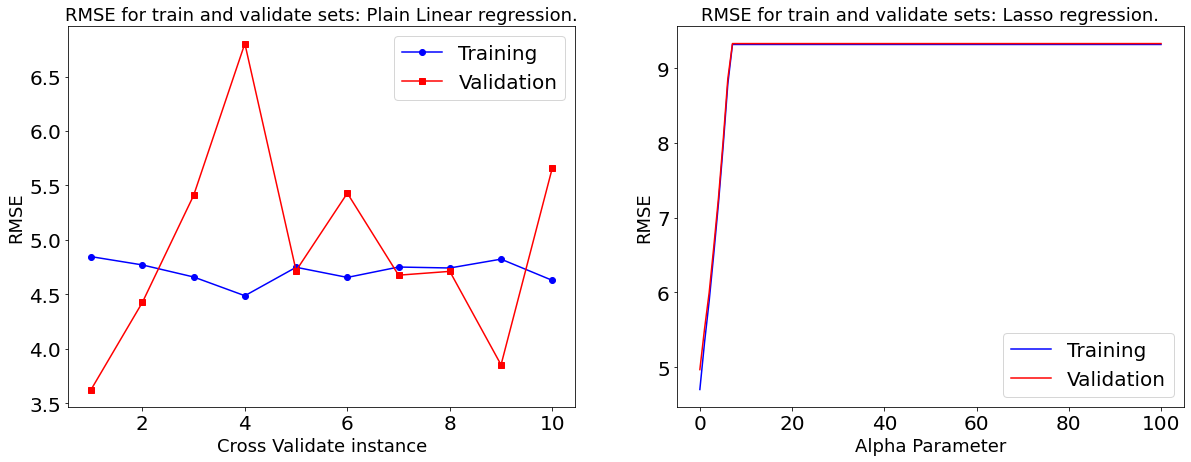

In [153]:
fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

axes[1].plot(x4, z4, label = "Training", color='blue')
axes[1].plot(x4, y4, label = "Validation", color='red')

axes[1].set_title('RMSE for train and validate sets: Lasso regression.', size = 18)
axes[1].set_xlabel('Alpha Parameter', fontsize = 18)
axes[1].set_ylabel('RMSE', fontsize = 18)
axes[1].legend(fontsize = 20)
# plt.xticks(x)
axes[1].tick_params(axis='both', labelsize=20)


axes[0].plot(z, x, label = "Training", color='blue', marker = 'o')
axes[0].plot(z, y, label = "Validation", color='red', marker = 's')

axes[0].set_title('RMSE for train and validate sets: Plain Linear regression.', size = 18)
axes[0].set_xlabel('Cross Validate instance', fontsize = 18)
axes[0].set_ylabel('RMSE', fontsize = 18)
axes[0].legend(fontsize = 20)
# plt.ylim(0.975, 1.00)
# axes[0].xticks(z)
axes[0].tick_params(axis='both', labelsize=20)